In [30]:
import numpy as np
import polars as pl
from pathlib import Path
from utils import plot_utils, plot_utils_case
import matplotlib.pyplot as plt
from scipy.stats import bootstrap
from glob import glob
import os
from tqdm import tqdm
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

In [31]:
# metric:
# the result (experiments) should be done for each alpha
# patch-level
# - empirical coverage (misconverage rate could be obtained from 1 - empirical coverage)
#   - total
#   - only for ihc_score 0,1,2-,2+,3+
#   - only for label 0, 1
# - average set size
#   - total
#   - only for ihc_score 0,1,2-,2+,3+
#   - only for label 0, 1
# - accuracy/precision/recall/f1 for confident predictions only
# - ambiguity rate (size = 2)
#   - total
#   - only for ihc_score 0,1,2-,2+,3+
#   - only for label 0, 1

# case-level
# precision/recall/f1
# ambiguity rate (for case)


In [32]:
root = "../results_cp/orig_feat_level_16_white_balance_False_scale_0.25_trial_100_n_est_200_model_rf_alpha_min_0.02_alpha_max_0.2_step_alpha_0.02_dryrun_ Falsealpha0alpha1"
root = Path(root)
cv = 4
r_min = 0
r_max = 100
#alphas = [0.025, 0.050, 0.075, 0.1, 0.125, 0.150, 0.175, 0.2]
alphas = np.arange(0.02, 0.2+0.02, 0.02)

In [33]:
# renaming steps
def rename(src):
    last_part = src.split("/")[-1]
    splits = last_part.split("_")
    splits[3] = str(round(float(splits[3]), 2))
    splits[5] = str(round(float(splits[5]), 2))
    new_last_part = "_".join(splits)
    new_path = Path(src).parent / new_last_part
    return new_path

paths = glob(os.path.join(root, "*", "*"))
for i in tqdm(range(len(paths))):
    tmp_path = paths[i]
    last_part = tmp_path.split("/")[-1]
    splits = last_part.split("_")
    splits[3] = str(round(float(splits[3]), 2))
    splits[5] = str(round(float(splits[5]), 2))
    new_last_part = "_".join(splits)
    new_path = Path(tmp_path).parent / new_last_part

    os.rename(tmp_path, new_path)

100%|██████████| 40400/40400 [00:00<00:00, 76171.25it/s]


In [34]:
# prep data for ambiguity
col_names1 = [f"ambi{i}" for i in range(5)]
labels1 = ["0", "1+", "2-", "2+", "3+"]
heights1 = plot_utils.agg_heights_v2(
        root, cv, r_min, r_max, alphas, 
        plot_utils.agg_patch_average_ambi_ihc,
        [f"ambi{i}" for i in range(5)]
    )

col_names2 = [f"ambi{i}" for i in range(2)]
labels2 = ["Neg", "Pos"]
heights2 = plot_utils.agg_heights_v2(
        root, cv, r_min, r_max, alphas, 
        plot_utils.agg_patch_average_ambi_her2,
        col_names2
    )

col_names3 = [f"ambi{i}" for i in range(5)]
labels3 = ["0", "1+", "2-", "2+", "3+"]
heights3 = plot_utils_case.agg_heights_v2(
        root, cv, r_min, r_max, alphas, 
        plot_utils_case.agg_case_average_ambi_ihc,
        col_names3
    )

col_names4 = [f"ambi{i}" for i in range(2)]
labels4 = ["Neg", "Pos"]
heights4 = plot_utils_case.agg_heights_v2(
        root, cv, r_min, r_max, alphas, 
        plot_utils_case.agg_case_average_ambi_her2,
        col_names2
    )

/home/surayuth/her2/.venv/lib/python3.12/site-packages/scipy/stats/_resampling.py:149: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/home/surayuth/her2/analysis/utils/plot_utils_case.py:325: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  bi = bootstrap((arr_stats)[:,i].reshape(1,-1), statistic=np.mean)


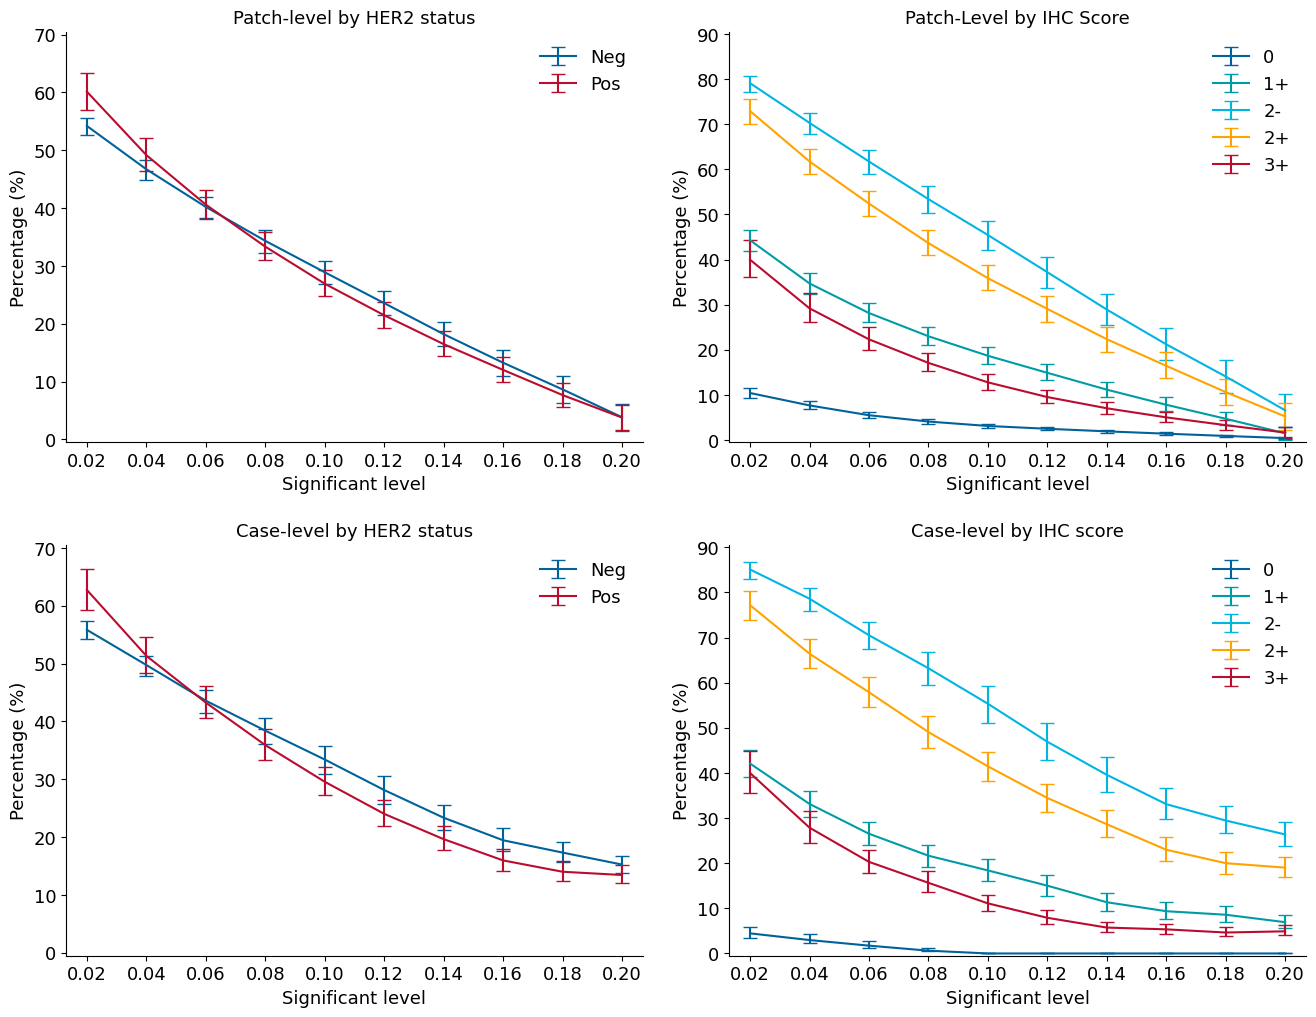

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'wspace': 0.15, 'hspace': 0.25})

colors = ["#00629B", "#009CA6", "#00B5E2", "#FFA300", "#BA0C2F"]
for i, col in enumerate(col_names1):
    lower_error = heights1[col]["err_min"]
    upper_error = heights1[col]["err_max"]
    asymmetric_error = [lower_error, upper_error]
    axs[0, 1].errorbar(
        alphas, 
        heights1[col]["mean"], 
        yerr=asymmetric_error, fmt="-", 
        color=colors[i],
        label=labels1[i], capsize=5
    )
axs[0, 1].legend(frameon=False, fontsize=13)
axs[0, 1].set_xticks(
    ticks=[n for n in alphas], 
    labels=[format(round(n, 2), ".2f") for n in alphas],
    fontsize=13
)
axs[0, 1].set_yticks(
    ticks=np.arange(0, 90+10, 10),
    labels=np.arange(0, 90+10, 10),
    fontsize=13
)
axs[0, 1].set_ylim([0 - 0.5, 90 + 0.5])
axs[0, 1].set_ylabel("Percentage (%)", fontsize=13)
axs[0, 1].set_title("Patch-Level by IHC Score", fontsize=13)
axs[0, 1].set_xlabel("Significant level", fontsize=13)
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)
axs[0, 1].set_xlim([alphas.min() - 0.007, alphas.max() + 0.007])

######################################################

colors = ["#00629B", "#BA0C2F"]                                                                                                 
for i, col in enumerate(col_names2):
    lower_error = heights2[col]["err_min"]
    upper_error = heights2[col]["err_max"]
    asymmetric_error = [lower_error, upper_error]
    axs[0, 0].errorbar(
        alphas, 
        heights2[col]["mean"], 
        yerr=asymmetric_error, fmt='-', 
        color=colors[i],
        label=labels2[i], capsize=5
    )
axs[0, 0].legend(frameon=False, fontsize=13)
axs[0, 0].set_xticks(
    ticks=[n for n in alphas], 
    labels=[format(round(n, 2), ".2f") for n in alphas],
    fontsize=13
)
axs[0, 0].set_yticks(
    ticks=np.arange(0, 70+10, 10),
    labels=np.arange(0, 70+10, 10),
    fontsize=13
)
axs[0, 0].set_ylim([0 - 0.5, 70 + 0.5])
axs[0, 0].set_ylabel("Percentage (%)", fontsize=13)
axs[0, 0].set_title("Patch-level by HER2 status", fontsize=13)
axs[0, 0].set_xlabel("Significant level", fontsize=13)
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)
axs[0, 0].set_xlim([alphas.min() - 0.007, alphas.max() + 0.007])

######################################################

colors = ["#00629B", "#009CA6", "#00B5E2", "#FFA300", "#BA0C2F"]
for i, col in enumerate(col_names3):
    lower_error = heights3[col]["err_min"]
    upper_error = heights3[col]["err_max"]
    asymmetric_error = [lower_error, upper_error]
    axs[1, 1].errorbar(
        alphas, 
        heights3[col]["mean"], 
        yerr=asymmetric_error, fmt='-', 
        color=colors[i],
        label=labels3[i], capsize=5
    )
axs[1, 1].legend(frameon=False, fontsize=13)
axs[1, 1].set_xticks(
    ticks=[n for n in alphas], 
    labels=[format(round(n, 2), ".2f") for n in alphas],
    fontsize=13
)
axs[1, 1].set_yticks(
    ticks=np.arange(0, 90+10, 10),
    labels=np.arange(0, 90+10, 10),
    fontsize=13
)
axs[1, 1].set_ylim([0 - 0.5, 90 + 0.5])
axs[1, 1].set_ylabel("Percentage (%)", fontsize=13)
axs[1, 1].set_title("Case-level by IHC score", fontsize=13)
axs[1, 1].set_xlabel("Significant level", fontsize=13)
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)
axs[1, 1].set_xlim([alphas.min() - 0.007, alphas.max() + 0.007])

# ######################################################

colors = ["#00629B", "#BA0C2F"]
for i, col in enumerate(col_names4):
    lower_error = heights4[col]["err_min"]
    upper_error = heights4[col]["err_max"]
    asymmetric_error = [lower_error, upper_error]
    axs[1, 0].errorbar(
        alphas, 
        heights4[col]["mean"], 
        yerr=asymmetric_error, fmt='-', 
        color=colors[i],
        label=labels4[i], capsize=5
    )
axs[1, 0].legend(frameon=False, fontsize=13)
axs[1, 0].set_xticks(
    ticks=[n for n in alphas], 
    labels=[format(round(n, 2), ".2f") for n in alphas],
    fontsize=13
)
axs[1, 0].set_xlim([alphas.min() - 0.007, alphas.max() + 0.007])
axs[1, 0].set_yticks(
    ticks=np.arange(0, 70+10, 10),
    labels=np.arange(0, 70+10, 10),
    fontsize=13
)
axs[1, 0].set_ylim([0 - 0.5, 70 + 0.5])
axs[1, 0].set_ylabel("Percentage (%)", fontsize=13)
axs[1, 0].set_title("Case-level by HER2 status", fontsize=13)
axs[1, 0].set_xlabel("Significant level", fontsize=13)
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)

# fig.suptitle("Ambiguity at Different Significant Levels", y=0.94, fontsize=16, weight="bold")
#fig.tight_layout()
fig.savefig("figs/tmp_ambiguity.png", dpi=300, bbox_inches="tight")

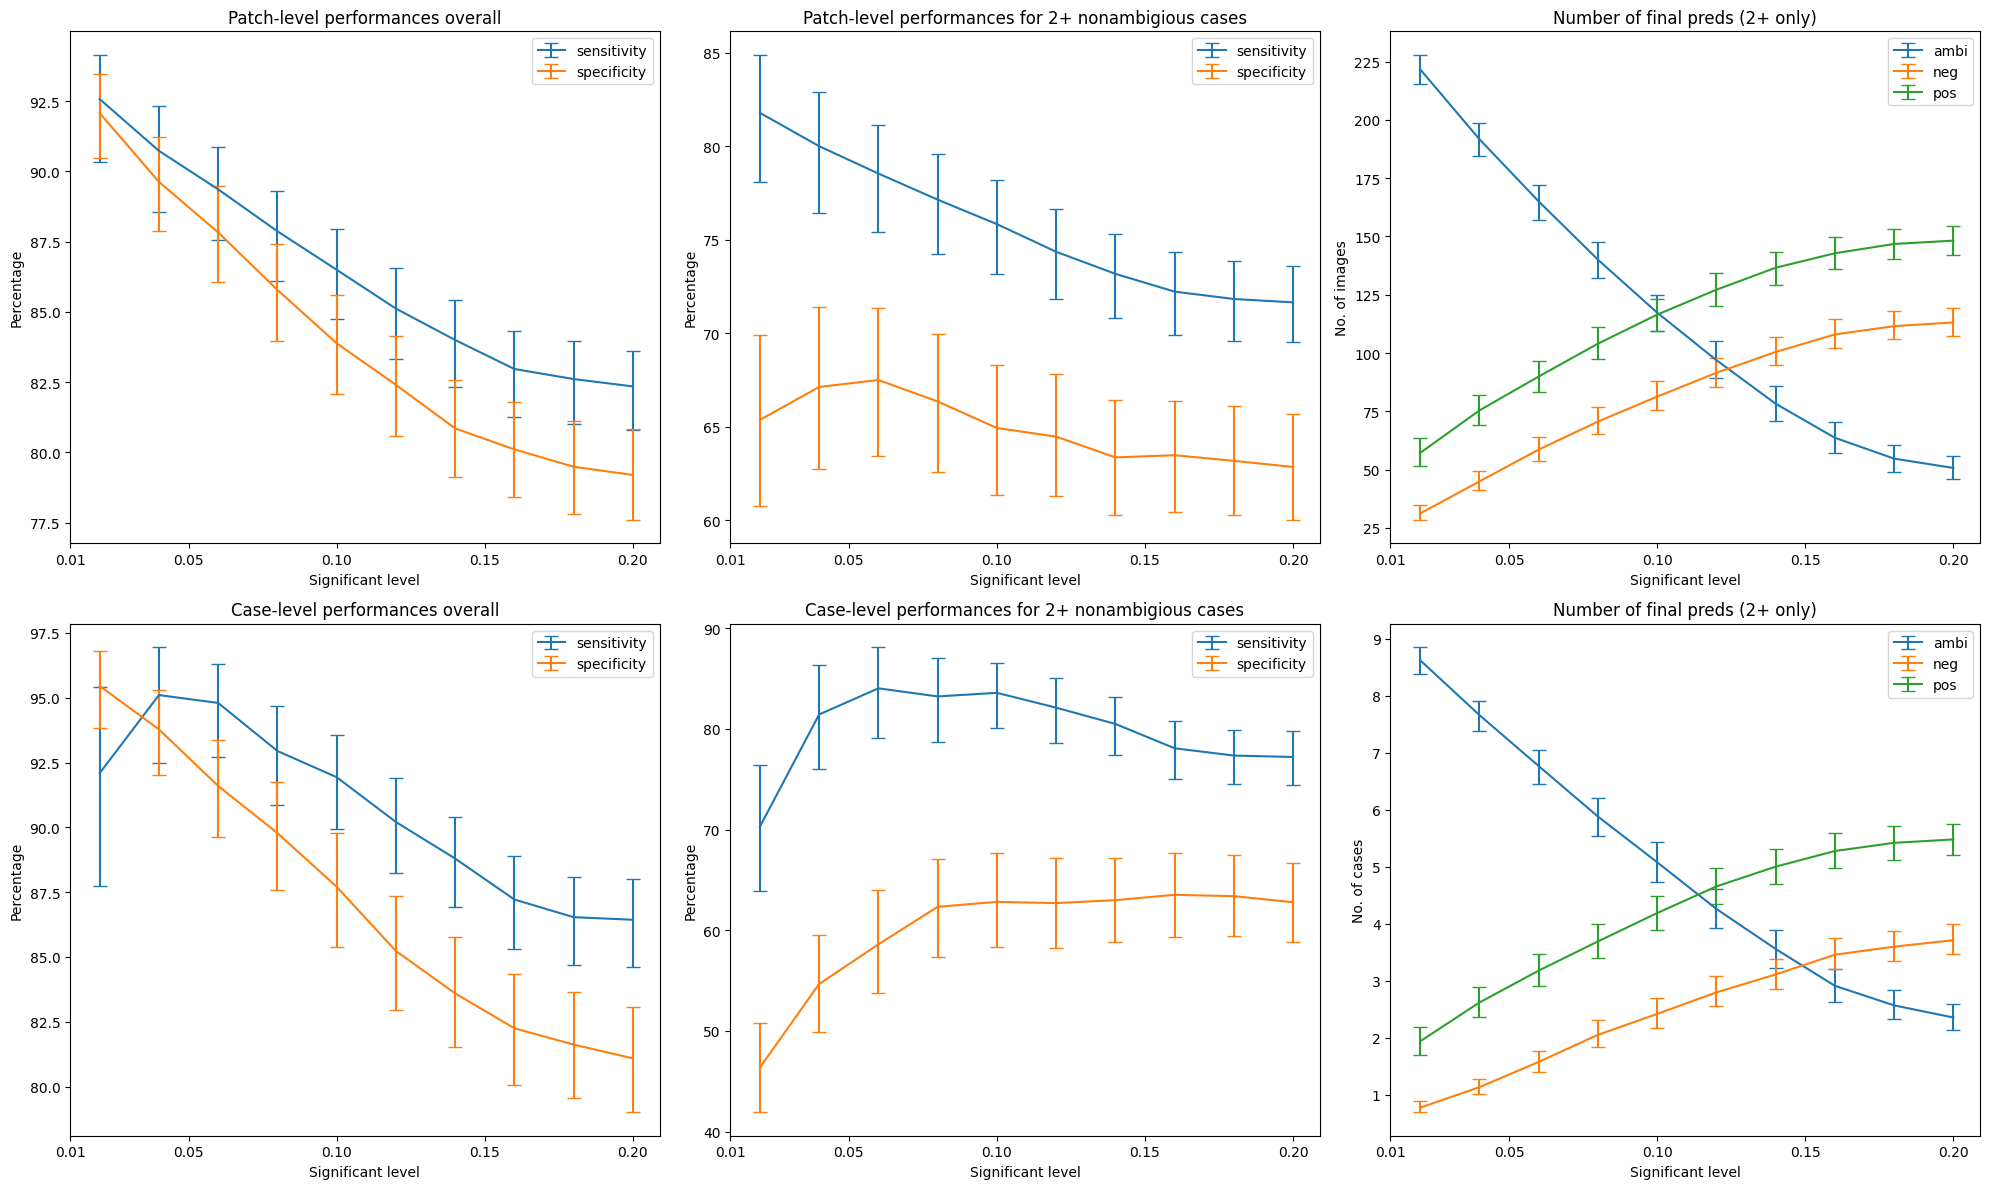

In [38]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

col_names = ["sensitivity","specificity", "ambi"]

heights = plot_utils.agg_heights_v2(
        root, cv, r_min, r_max, alphas, 
        plot_utils.agg_patch_tpr_fpr_ovr,
        col_names
    )

for i, col in enumerate(col_names[:-1]):
    lower_error = heights[col]["err_min"]
    upper_error = heights[col]["err_max"]
    asymmetric_error = [lower_error, upper_error]
    axs[0, 0].errorbar(
        alphas, 
        heights[col]["mean"], 
        yerr=asymmetric_error, fmt='-', 
        label=col, capsize=5
    )

axs[0, 0].set_xlabel("Significant level")
axs[0, 0].set_ylabel("Percentage")
axs[0, 0].legend()
axs[0, 0].set_xticks(
    ticks=[0.01, 0.05, 0.1, 0.15, 0.2], 
    labels=["0.01", "0.05", "0.10", "0.15", "0.20"]
)
axs[0, 0].set_title("Patch-level performances overall")

######################################################

col_names = ["sensitivity","specificity", "ambi"]

heights = plot_utils.agg_heights_v2(
        root, cv, r_min, r_max, alphas, 
        plot_utils.agg_patch_tpr_fpr,
        col_names
    )

for i, col in enumerate(col_names[:-1]):
    lower_error = heights[col]["err_min"]
    upper_error = heights[col]["err_max"]
    asymmetric_error = [lower_error, upper_error]
    axs[0, 1].errorbar(
        alphas, 
        heights[col]["mean"], 
        yerr=asymmetric_error, fmt='-', 
        label=col, capsize=5
    )

axs[0, 1].set_xlabel("Significant level")
axs[0, 1].set_ylabel("Percentage")
axs[0, 1].legend()
axs[0, 1].set_xticks(
    ticks=[0.01, 0.05, 0.1, 0.15, 0.2], 
    labels=["0.01", "0.05", "0.10", "0.15", "0.20"]
)
axs[0, 1].set_title("Patch-level performances for 2+ nonambigious cases")

######################################################

col_names = ["sensitivity","specificity", "ambi"]

heights = plot_utils_case.agg_heights_v2(
        root, cv, r_min, r_max, alphas, 
        plot_utils_case.agg_case_tpr_fpr_ovr,
        col_names
    )

for i, col in enumerate(col_names[:-1]):
    lower_error = heights[col]["err_min"]
    upper_error = heights[col]["err_max"]
    asymmetric_error = [lower_error, upper_error]
    axs[1, 0].errorbar(
        alphas, 
        heights[col]["mean"], 
        yerr=asymmetric_error, fmt='-', 
        label=col, capsize=5
    )

axs[1, 0].set_xlabel("Significant level")
axs[1, 0].set_ylabel("Percentage")
axs[1, 0].legend()
axs[1, 0].set_xticks(
    ticks=[0.01, 0.05, 0.1, 0.15, 0.2], 
    labels=["0.01", "0.05", "0.10", "0.15", "0.20"]
)
axs[1, 0].set_title("Case-level performances overall")

######################################################

col_names = ["sensitivity","specificity", "ambi"]

heights = plot_utils_case.agg_heights_v2(
        root, cv, r_min, r_max, alphas, 
        plot_utils_case.agg_case_tpr_fpr,
        col_names
    )

for i, col in enumerate(col_names[:-1]):
    lower_error = heights[col]["err_min"]
    upper_error = heights[col]["err_max"]
    asymmetric_error = [lower_error, upper_error]
    axs[1, 1].errorbar(
        alphas, 
        heights[col]["mean"], 
        yerr=asymmetric_error, fmt='-', 
        label=col, capsize=5
    )

axs[1, 1].set_xlabel("Significant level")
axs[1, 1].set_ylabel("Percentage")
axs[1, 1].legend()
axs[1, 1].set_xticks(
    ticks=[0.01, 0.05, 0.1, 0.15, 0.2], 
    labels=["0.01", "0.05", "0.10", "0.15", "0.20"]
)
axs[1, 1].set_title("Case-level performances for 2+ nonambigious cases")

######################################################

col_names = ["ambi", "neg", "pos"]

heights = plot_utils.agg_heights_v2(
        root, cv, r_min, r_max, alphas, 
        plot_utils.agg_patch_final_pred,
        col_names
    )

for i, col in enumerate(col_names):
    lower_error = np.array(heights[col]["err_min"]) / 100
    upper_error = np.array(heights[col]["err_max"]) / 100
    asymmetric_error = [lower_error, upper_error]
    axs[0, 2].errorbar(
        alphas, 
        np.array(heights[col]["mean"]) / 100, 
        yerr=asymmetric_error, fmt='-', 
        label=col, capsize=5
    )
axs[0, 2].legend()

axs[0, 2].set_xlabel("Significant level")
axs[0, 2].set_ylabel("No. of images")
axs[0, 2].legend()
axs[0, 2].set_xticks(
    ticks=[0.01, 0.05, 0.1, 0.15, 0.2], 
    labels=["0.01", "0.05", "0.10", "0.15", "0.20"]
)
axs[0, 2].set_title("Number of final preds (2+ only)")

######################################################


col_names = ["ambi", "neg", "pos"]

heights = plot_utils_case.agg_heights_v2(
        root, cv, r_min, r_max, alphas, 
        plot_utils_case.agg_case_final_pred,
        col_names
    )

for i, col in enumerate(col_names):
    lower_error = np.array(heights[col]["err_min"]) / 100
    upper_error = np.array(heights[col]["err_max"]) / 100
    asymmetric_error = [lower_error, upper_error]
    axs[1, 2].errorbar(
        alphas, 
        np.array(heights[col]["mean"]) / 100, 
        yerr=asymmetric_error, fmt='-', 
        label=col, capsize=5
    )
axs[1, 2].legend()

axs[1, 2].set_xlabel("Significant level")
axs[1, 2].set_ylabel("No. of cases")
axs[1, 2].legend()
axs[1, 2].set_xticks(
    ticks=[0.01, 0.05, 0.1, 0.15, 0.2], 
    labels=["0.01", "0.05", "0.10", "0.15", "0.20"]
)
axs[1, 2].set_title("Number of final preds (2+ only)")


# One possible reason of increasing specificity in the case-level of 2+ case is that 
# the cases that are likely to misclassify are pushed into the "ambigious" cases
# which means we are left with only the "easy" case.

fig.tight_layout()
fig.savefig("figs/tmp_performance.png")
